##데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the libraries
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive (2)_.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp/dataset') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
data_dir = '../tmp/dataset/PokemonData'

classes = os.listdir(data_dir)
print(os.listdir(data_dir))
print(len(classes))

['Pidgey', 'Wigglytuff', 'Primeape', 'Koffing', 'Farfetchd', 'Magnemite', 'Metapod', 'Staryu', 'Hitmonlee', 'Golduck', 'Moltres', 'Pinsir', 'Kabutops', 'Haunter', 'Diglett', 'Pidgeot', 'Psyduck', 'Dragonite', 'Alolan Sandslash', 'Lapras', 'Dugtrio', 'Kakuna', 'Meowth', 'Nidoqueen', 'Articuno', 'Porygon', 'Fearow', 'Magmar', 'Slowpoke', 'Vaporeon', 'Sandshrew', 'Jigglypuff', 'Arbok', 'Gastly', 'Butterfree', 'Arcanine', 'Seaking', 'Hypno', 'Cubone', 'Krabby', 'Mewtwo', 'Electabuzz', 'Rhydon', 'Venusaur', 'Persian', 'Slowbro', 'Nidorina', 'Ninetales', 'Golbat', 'Sandslash', 'Omanyte', 'Jolteon', 'Gloom', 'Seel', 'Mew', 'Doduo', 'Tentacool', 'Tentacruel', 'Starmie', 'Rhyhorn', 'Flareon', 'Machamp', 'Growlithe', 'Ponyta', 'Exeggutor', 'Nidoking', 'Charmander', 'Parasect', 'Zapdos', 'Aerodactyl', 'Poliwrath', 'Beedrill', 'Charizard', 'Dragonair', 'Horsea', 'Victreebel', 'Clefable', 'Graveler', 'Poliwhirl', 'Dodrio', 'Drowzee', 'Weedle', 'Golem', 'Gyarados', 'Ekans', 'Kadabra', 'Bulbasaur', '

# 데이터 전처리

In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps

#다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
num_augmented_images = 50

file_path = '/tmp/dataset/PokemonData/'
dir_names = os.listdir(file_path)
total_origin_dir_num = len(dir_names)
print(len(dir_names))
augment_cnt = 1


for i in range(0, total_origin_dir_num):
    dir_name = dir_names[i]
    file_names=os.listdir(file_path+dir_name)
    total_origin_image_num=len(file_names)          #폴더당 이미지 개수
    for k in range(0, total_origin_image_num):      #폴더의 이미지만큼 반복
      change_picture_index = k
      file_name = file_names[change_picture_index]  #전환할 이미지
      origin_image_path = '/tmp/dataset/PokemonData/'+dir_name +'/'+file_name
      print(origin_image_path)
      image = Image.open(origin_image_path)
      random_augment = random.randrange(1,3)
      save_image_path='/tmp/dataset/PokemonData/'+dir_name+'/'
      if(random_augment == 1):
          #이미지 좌우 반전
          print("invert")
          inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
          inverted_image.save(save_image_path + 'inverted_' + str(augment_cnt) + '.png')   
      elif(random_augment == 2):
          #이미지 기울이기
          print("rotate")
          rotated_image = image.rotate(random.randrange(-20, 20))
          rotated_image.save(save_image_path + 'rotated_' + str(augment_cnt) + '.png')

      augment_cnt += 1  #파일 개수
    augment_cnt=1#파일 개수 초기화

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/tmp/dataset/PokemonData/Alakazam/1115f34ff9884a6ab3ceaafa87a0dfd4.jpg
rotate
/tmp/dataset/PokemonData/Alakazam/30bb8818f4574e319d59835d98dc5959.jpg
invert
/tmp/dataset/PokemonData/Alakazam/83d63caf8d904ea38f2a48e6ed926141.jpg
invert
/tmp/dataset/PokemonData/Alakazam/0bdefe16e8734bf0a8653ec64123ffe9.jpg
rotate
/tmp/dataset/PokemonData/Alakazam/e4f9bb3159924d988611bd835ef5ffa5.jpg
invert
/tmp/dataset/PokemonData/Alakazam/dde6dba6b0204589be28d230ccef9c48.jpg
invert
/tmp/dataset/PokemonData/Alakazam/19e3ed99fae14c04af32a8d2f31d50cd.jpg
invert
/tmp/dataset/PokemonData/Alakazam/af93757c33894660855c1e238fc19137.jpg
invert
/tmp/dataset/PokemonData/Alakazam/a2365c6b200046588d69a4d8bd6b4d98.jpg
invert
/tmp/dataset/PokemonData/Alakazam/601729d8dcd84c688d51072821a7dc8b.jpg
invert
/tmp/dataset/PokemonData/Alakazam/12973b3848734107b246eaee2a9cd698.jpg
rotate
/tmp/dataset/PokemonData/Zubat/1ec8e81d53ef4a1ca0bffa047a054445.jpg
rotate
/tmp/dataset/PokemonData/Zubat/

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
import splitfolders

In [ ]:
#저장 경로를 drive로 해서 최초 1번만 실행
splitfolders.ratio("/tmp/dataset/PokemonData", output="/content/drive/MyDrive/preprocessing",seed=1337, ratio=(.8, .18, .02), group_prefix=None, move=False)

Copying files: 13642 files [01:50, 123.72 files/s]


In [ ]:
tf= transforms.Compose([
    transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))
])

#미리 드라이브에 저장해놓은 데이터를 로드
traindata=datasets.ImageFolder(root='/content/drive/MyDrive/preprocessing/train',transform=tf)
testdata=datasets.ImageFolder(root='/content/drive/MyDrive/preprocessing/val',transform=tf)

In [ ]:
batch_size=32
trainloader=DataLoader(traindata,batch_size=batch_size, shuffle=True)
testloader=DataLoader(testdata,batch_size=batch_size, shuffle=True)
train_images,train_labels=iter(trainloader).next()
print(train_labels)

tensor([ 62, 148,  70,  13, 115,  13, 104, 139, 108,   4,  84,  84, 107,  63,
        126, 121, 131,   9, 137,  30, 119,  97, 126,  62,  31,  54,  82,  25,
        112,  86,  83,  72])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


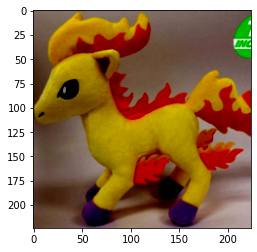

Label: 62


In [ ]:
from torchvision.transforms.functional import normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



#데이터 로더의 
print(f"Feature batch shape: {train_images.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = np.transpose(train_images[12].numpy(), (1,2,0))
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#데이터로더의 이미지를 batch size 만큼 출력
#for data in trainloader:
#  img,label=data
#  plt.imshow(torchvision.utils.make_grid(img,normalize=True).permute(1,2,0))
#  plt.show()